<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
#Start Here

from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

import spacy

import pandas as pd

In [2]:
%pwd

'/Users/jing/Documents/LambdaSchool/LS_DS_unit4/DS-Unit-4-Sprint-1-NLP/module4-topic-modeling'

In [3]:
%ls ../module1-text-data/data

Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv*
Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip
yelp_coffeeshop_review_data.csv


In [57]:
df = pd.read_csv('../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [17]:
print(df.shape)
df.head(3)


(28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."


In [18]:
# Subset to just one product or Category here
df.columns.tolist()

['id',
 'dateAdded',
 'dateUpdated',
 'name',
 'asins',
 'brand',
 'categories',
 'primaryCategories',
 'imageURLs',
 'keys',
 'manufacturer',
 'manufacturerNumber',
 'reviews.date',
 'reviews.dateSeen',
 'reviews.didPurchase',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.numHelpful',
 'reviews.rating',
 'reviews.sourceURLs',
 'reviews.text',
 'reviews.title',
 'reviews.username',
 'sourceURLs']

In [19]:
df['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: primaryCategories, dtype: int64

In [58]:
df = df[df['primaryCategories'] == 'Electronics'].copy()

## Get Tokens

In [22]:
nlp = spacy.load("en_core_web_lg")

In [59]:
tokens = []

for doc in nlp.pipe(df['reviews.text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.lemma_.lower())
            
    tokens.append(doc_tokens)
        
df['tokens'] = tokens

del tokens

In [60]:
df['tokens'].head()

8343    [great, case, place, husband, love, hold, lot,...
8344    [discard, get, rid, broken, cd, case, broken, ...
8345                            [dollar, boycott, amazon]
8346    [initial, impression, good, material, nice, sh...
8347    [pro, standard, echo, con, old, generation, ec...
Name: tokens, dtype: object

# Create dictionary


In [61]:
dictionary = Dictionary(df['tokens'])
print(len(dictionary))

6279


In [62]:
dictionary.filter_extremes(no_below=.05, no_above=.98)
print(len(dictionary))

6279


## Create Corpus Object

In [63]:
corpus = [dictionary.doc2bow(d) for d in df['tokens']]

In [64]:
lda = LdaMulticore(corpus=corpus, 
                     num_topics=10, 
                     id2word=dictionary, 
                     workers=4, 
                     passes=5)

In [65]:
lda.print_topics()

[(0,
  '0.068*"great" + 0.051*"tablet" + 0.035*"use" + 0.026*"easy" + 0.026*"good" + 0.014*"amazon" + 0.013*"price" + 0.013*"kid" + 0.012*"battery" + 0.012*"product"'),
 (1,
  '0.037*"tablet" + 0.025*"good" + 0.018*"price" + 0.017*"amazon" + 0.015*"product" + 0.015*"work" + 0.014*"great" + 0.014*"ipad" + 0.014*"app" + 0.014*"android"'),
 (2,
  '0.061*"love" + 0.044*"game" + 0.042*"tablet" + 0.036*"play" + 0.021*"watch" + 0.021*"book" + 0.019*"read" + 0.019*"great" + 0.018*"use" + 0.017*"daughter"'),
 (3,
  '0.031*"good" + 0.029*"tablet" + 0.029*"easy" + 0.028*"use" + 0.027*"price" + 0.026*"great" + 0.022*"love" + 0.015*"size" + 0.014*"buy" + 0.011*"screen"'),
 (4,
  '0.051*"buy" + 0.025*"love" + 0.019*"good" + 0.014*"time" + 0.013*"old" + 0.012*"get" + 0.010*"fire" + 0.010*"use" + 0.010*"tablet" + 0.010*"like"'),
 (5,
  '0.044*"tablet" + 0.040*"love" + 0.034*"kid" + 0.028*"app" + 0.023*"need" + 0.021*"great" + 0.018*"good" + 0.013*"purchase" + 0.013*"use" + 0.012*"kindle"'),
 (6,
  '0.

In [66]:
import re
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
print(words)

[['great', 'tablet', 'use', 'easy', 'good', 'amazon', 'price', 'kid', 'battery', 'product'], ['tablet', 'good', 'price', 'amazon', 'product', 'work', 'great', 'ipad', 'app', 'android'], ['love', 'game', 'tablet', 'play', 'watch', 'book', 'read', 'great', 'use', 'daughter'], ['good', 'tablet', 'easy', 'use', 'price', 'great', 'love', 'size', 'buy', 'screen'], ['buy', 'love', 'good', 'time', 'old', 'get', 'fire', 'use', 'tablet', 'like'], ['tablet', 'love', 'kid', 'app', 'need', 'great', 'good', 'purchase', 'use', 'kindle'], ['tablet', 'use', 'work', 'love', 'amazon', 'purchase', 'year', 'buy', 'app', 'old'], ['kindle', 'love', 'fire', 'read', 'buy', 'book', 'great', 'tablet', 'old', 'new'], ['tablet', 'year', 'old', 'great', 'buy', 'love', 'kid', 'easy', 'time', '2'], ['amazon', 'like', 'app', 'device', 'tablet', 'use', 'kindle', 'screen', 'look', 'music']]


In [67]:
topics = [' '.join(t[0:5]) for t in words]
topics

['great tablet use easy good',
 'tablet good price amazon product',
 'love game tablet play watch',
 'good tablet easy use price',
 'buy love good time old',
 'tablet love kid app need',
 'tablet use work love amazon',
 'kindle love fire read buy',
 'tablet year old great buy',
 'amazon like app device tablet']

In [68]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n")

------ Topic 0 ------
great tablet use easy good
------ Topic 1 ------
tablet good price amazon product
------ Topic 2 ------
love game tablet play watch
------ Topic 3 ------
good tablet easy use price
------ Topic 4 ------
buy love good time old
------ Topic 5 ------
tablet love kid app need
------ Topic 6 ------
tablet use work love amazon
------ Topic 7 ------
kindle love fire read buy
------ Topic 8 ------
tablet year old great buy
------ Topic 9 ------
amazon like app device tablet


In [70]:
# Steps to Score Training Documents
# Already have BOW Represented called 'corpus'

# generate a table for topic distribution including all topics
distro = [lda[d] for d in corpus]

def update(distro):
        distro_updated = {k:0 for k in range(0,10)} #initialize topic distribution {topic:percentage}
        for item in distro:
            distro_updated[item[0]] = item[1]
        return distro_updated
    
new_distro = [update(d) for d in distro]

In [74]:
# How are topics correlated with rating? 

topics = pd.DataFrame.from_records(new_distro)
topics.head(10)

#topics['primaryTopic'] = topics.idxmax(axis=1)

,0,1,2,3,4,5,6,7,8,9
0,0.011118,0.011117,0.011116,0.011118,0.366587,0.544479,0.011116,0.011118,0.011116,0.011116
1,0.000000,0.000000,0.000000,0.000000,0.654228,0.000000,0.132319,0.000000,0.000000,0.202668
2,0.025043,0.025045,0.025041,0.025045,0.025041,0.025042,0.774611,0.025043,0.025043,0.025045
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.994261,0.000000,0.000000,0.000000
4,0.000000,0.245707,0.000000,0.000000,0.000000,0.000000,0.318559,0.000000,0.000000,0.381857
5,0.000000,0.000000,0.185692,0.243985,0.000000,0.000000,0.000000,0.213505,0.000000,0.319146
6,0.000000,0.000000,0.000000,0.485035,0.489122,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.479852,0.000000,0.000000,0.000000,0.000000,0.000000,0.462980
8,0.109408,0.000000,0.000000,0.000000,0.648083,0.000000,0.000000,0.000000,0.000000,0.218346
9,0.000000,0.000000,0.000000,0.930636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [78]:
 #find the index of the topic with maximum distribution weight
df['primaryTopic'] = topics.idxmax(axis=1)

In [79]:
df[['primaryTopic', 'reviews.rating']].groupby('primaryTopic').mean()

,reviews.rating
primaryTopic,
0.0,4.582583
1.0,4.532847
2.0,4.677019
3.0,4.613240
4.0,4.588710
5.0,4.536765
6.0,4.584615
7.0,4.578358
8.0,4.619835


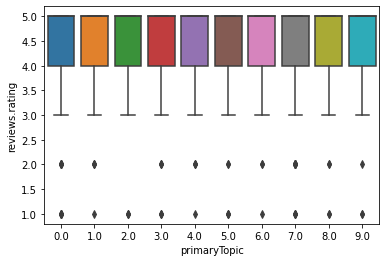

In [80]:
import seaborn as sns

ax = sns.boxplot(x="primaryTopic", y="reviews.rating",
                 data=df)

In [84]:
# Are certain topics more helpful? 
# or, is there a relationship between reviews.numHelpful and primary topics?

df['reviews.numHelpful'].describe()

count    13866.000000
mean         0.552430
std         10.034626
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        621.000000
Name: reviews.numHelpful, dtype: float64

In [85]:
# put topics and df into one dataframe
# Bin - using boxplot of upvotes per topic? 

topics_df = pd.DataFrame.from_records(new_distro)

In [86]:
topics_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.011118,0.011117,0.011116,0.011118,0.366587,0.544479,0.011116,0.011118,0.011116,0.011116
1,0.000000,0.000000,0.000000,0.000000,0.654228,0.000000,0.132319,0.000000,0.000000,0.202668
2,0.025043,0.025045,0.025041,0.025045,0.025041,0.025042,0.774611,0.025043,0.025043,0.025045
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.994261,0.000000,0.000000,0.000000
4,0.000000,0.245707,0.000000,0.000000,0.000000,0.000000,0.318559,0.000000,0.000000,0.381857


In [87]:
topics_df['primaryTopic'] = topics_df.idxmax(axis=1)

In [88]:
topics_df['primaryTopic'].value_counts()

0    2138
3    1871
7    1765
8    1755
5    1600
2    1548
4    1029
1     922
9     686
6     681
Name: primaryTopic, dtype: int64

In [89]:
topics_df['numHelpful'] = df['reviews.numHelpful']

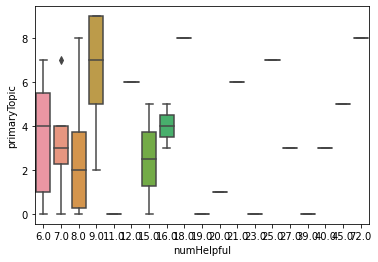

In [90]:
sns.boxplot(x="numHelpful", y="primaryTopic",  data=topics_df[(topics_df['numHelpful'] > 5) & (topics_df['numHelpful'] < 100)]);

In [91]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda, corpus, dictionary)

/Users/jing/anaconda3/envs/NLP/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.008241  0.034733       1        1  12.802299
0     -0.004851  0.091132       2        1  12.603642
8      0.102487 -0.048386       3        1  12.541323
3     -0.018891  0.067032       4        1  11.493891
5      0.060202 -0.014968       5        1   9.762775
2      0.090258  0.054658       6        1   9.154170
1     -0.103403  0.002776       7        1   8.380258
9     -0.144552 -0.031048       8        1   8.067680
4      0.024847 -0.104328       9        1   7.755150
6     -0.014339 -0.051601      10        1   7.438816, topic_info=     Category         Freq           Term        Total  loglift  logprob
6     Default  4571.000000           love  4571.000000  30.0000  30.0000
141   Default  1554.000000           year  1554.000000  29.0000  29.0000
1166  Default  1552.000000           game  1552.000000  28.0000  28.0000
1362  Default  2019.000000            kid  2019.000000  27.0000  27.0000
107   Default  1923.000000            old  1923.000000  26.0000  26.0000
230   Default  3313.000000            buy  3313.000000  25.0000  25.0000
35    Default  1398.000000           play  1398.000000  24.0000  24.0000
2     Default  4737.000000          great  4737.000000  23.0000  23.0000
229   Default  1936.000000            app  1936.000000  22.0000  22.0000
92    Default  2951.000000           good  2951.000000  21.0000  21.0000
86    Default  2465.000000           easy  2465.000000  20.0000  20.0000
886   Default  1564.000000           read  1564.000000  19.0000  19.0000
448   Default  1528.000000           book  1528.000000  18.0000  18.0000
330   Default   929.000000           need   929.000000  17.0000  17.0000
180   Default   739.000000          watch   739.000000  16.0000  16.0000
1521  Default   479.000000         google   479.000000  15.0000  15.0000
52    Default  2138.000000         amazon  2138.000000  14.0000  14.0000
705   Default  6404.000000         tablet  6404.000000  13.0000  13.0000
1000  Default  2386.000000         kindle  2386.000000  12.0000  12.0000
116   Default  1981.000000          price  1981.000000  11.0000  11.0000
1508  Default   791.000000       daughter   791.000000  10.0000  10.0000
1150  Default   309.000000        android   309.000000   9.0000   9.0000
250   Default  3280.000000            use  3280.000000   8.0000   8.0000
44    Default   600.000000          store   600.000000   7.0000   7.0000
27    Default  1732.000000           like  1732.000000   6.0000   6.0000
183   Default   892.000000         device   892.000000   5.0000   5.0000
999   Default  2053.000000           fire  2053.000000   4.0000   4.0000
1469  Default   344.000000  granddaughter   344.000000   3.0000   3.0000
907   Default   908.000000           gift   908.000000   2.0000   2.0000
57    Default   543.000000              2   543.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
3113  Topic10    22.999281       freetime    61.450394   1.6157  -6.4415
141   Topic10   189.331573           year  1554.942871   0.4928  -4.3335
118   Topic10    72.263931        problem   353.984741   1.0095  -5.2966
418   Topic10    66.116409              5   309.530762   1.0548  -5.3856
250   Topic10   293.329163            use  3280.775146   0.1839  -3.8957
211   Topic10    69.586548         access   360.071686   0.9547  -5.3344
52    Topic10   208.506577         amazon  2138.274170   0.2707  -4.2370
705   Topic10   405.906586         tablet  6404.083984  -0.1601  -3.5708
775   Topic10    43.847870         better   181.135361   1.1799  -5.7962
231   Topic10    25.957384          cable    78.800110   1.4880  -6.3205
229   Topic10   170.662903            app  1936.892334   0.1693  -4.4373
107   Topic10   167.063950            old  1923.853149   0.1547  -4.4586
947   Topic10    73.924500            far   478.493866   0.7309  -5.2739
230   Topic10   181.8118

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling